## Plot the E1's

In [4]:
# Load the files back as the same dict to be able to start from here next time

import pandas as pd
import numpy as np

eig_dict = {}
resolutions = [10_000, 50_000, 100_000]

for resolution in resolutions:
    eig_dict[resolution] = {}
    eig_dict[resolution]['X'] = pd.read_csv(
        f"../data/eigs/sperm_X.chr8.eigs.{resolution}.arms.cis.vecs.tsv",
        sep="\t"
    )
    eig_dict[resolution]['Y'] = pd.read_csv(
        f"../data/eigs/sperm_Y.chr8.eigs.{resolution}.arms.cis.vecs.tsv",
        sep="\t"
    )



In [5]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

plt.style.use('smaller.mplstyle')

import numpy as np


from scipy.stats import norm

def plot_e1_distribution(df, e1_column='E1', start_column='start', bins=51, title=None):
    """
    Plots the histogram and normal distributions of E1 values for A and B compartments.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        e1_column (str): Column name for E1 values.
        start_column (str): Column name for start positions (optional, not used in the plot).
        bins (int): Number of bins for the histogram.
    """
    x = df[start_column].values
    y = df[e1_column].values

    f, ax = plt.subplots()
    xmin, xmax = ax.set_xlim(-2,2)
    bins = np.linspace(xmin, xmax, bins)

    # A compartments
    ax.hist(y[y > 0], bins=bins, color="tab:red", alpha=0.5, label="A", )
    # B compartments
    ax.hist(y[y < 0], bins=bins, color="tab:blue", alpha=0.5, label="B",)
    # Mean values (vline)
    ax.axvline(y[y > 0].mean(), color="tab:red", linestyle="--", label="Mean A")
    ax.axvline(y[y < 0].mean(), color="tab:blue", linestyle="--", label="Mean B")

    # # Plot the normal distributions
    # x_values = np.linspace(y.min(), y.max(), 1000)
    # mean_a = np.median(y[y > 0])
    # mean_b = np.median(y[y < 0])
    # std_a = y[y > 0].std()
    # std_b = y[y < 0].std()

    # ax.plot(x_values, norm.pdf(x_values, loc=mean_a, scale=std_a), color="tab:red", label="Normal A")
    # ax.plot(x_values, norm.pdf(x_values, loc=mean_b, scale=std_b), color="tab:blue", label="Normal B")
    # stacked = norm.pdf(x_values, loc=mean_a, scale=std_a) + norm.pdf(x_values, loc=mean_b, scale=std_b)
    # ax.plot(x_values, stacked, color="tab:purple", label="Stacked Normals")

    # Final touches
    plt.xlabel("E1")
    plt.ylabel("Density")
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


# Plot the E1 tracks saved in a dict

def plot_eigenvectors(df, title=None, scatter=True, scatter_alpha=0.5):
    fig, ax = plt.subplots(figsize=(6, 1))

    x = df['start']
    y = df['E1']

    # # Make stairs
    # x_stairs = np.zeros(2* len(x))
    # x_stairs[::2] = x
    # x_stairs[1::2] = x + resolution
    # y_stairs = np.zeros(2* len(y))
    # y_stairs[::2] = y
    # y_stairs[1::2] = y


    if scatter:
        ax.scatter(x, y, s=0.4, color='k', alpha=scatter_alpha, ec='None')
    ax.fill_between(x, y, where = y<0, color='tab:blue', lw=1, ec='None', step='post', interpolate=True)
    ax.fill_between(x, y, where = y>0, color='tab:red', lw=1, ec='None', step='post', interpolate=True) 
    ax.set_title(title)
    ax.set_ylabel('E1')
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(-1,1)
    ax.set_xlabel('Genomic Position (Mbp)')
    ticks = np.arange(0, x.max(), step=100*resolution)
    ax.set_xticks(ticks)
    ax.set_xticklabels([f'{int(t/1e6)}' for t in ticks])
    ax.spines[:].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    plt.tight_layout()
    plt.show()




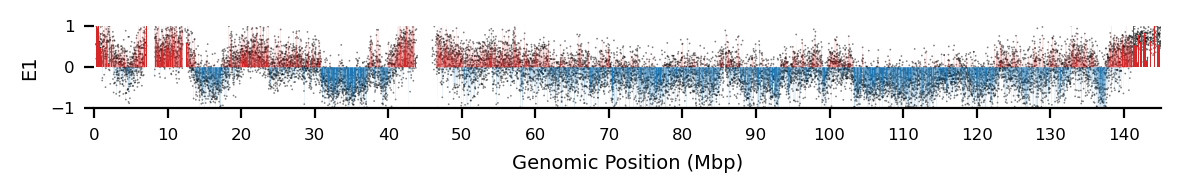

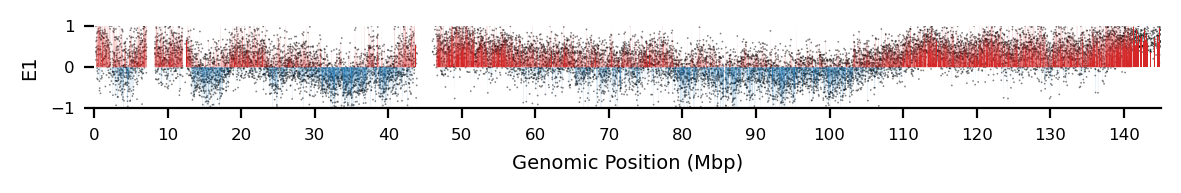

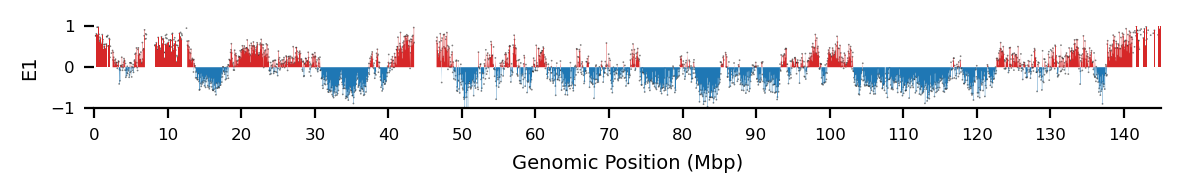

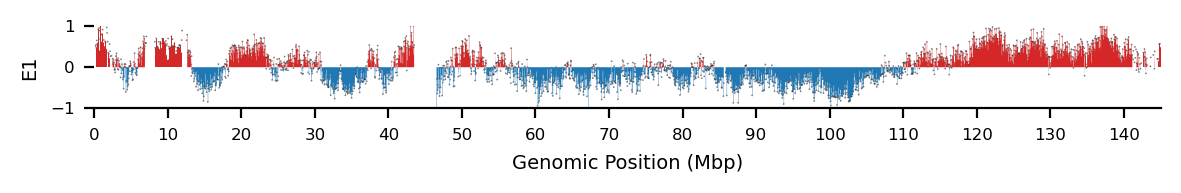

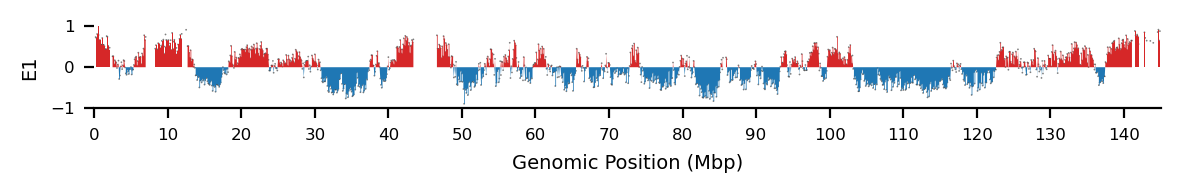

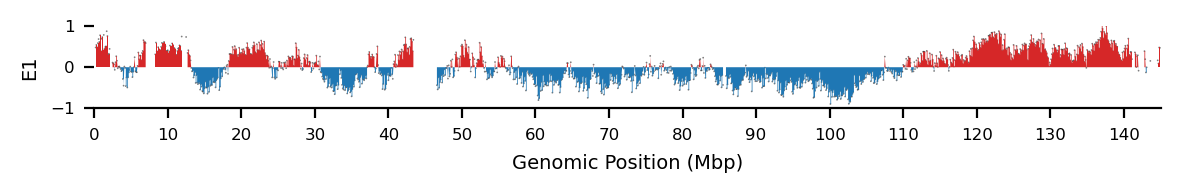

In [6]:
#| echo: false
#| label: fig-chr8-eigs
#| fig-cap: "Comparing the eigenvector E1 for chr8 in X- and Y-bearing sperm at different resolutions. Here, the eigenvectors are re-sorted by their Spearman correlation with the GC content."
#| fig-scap: "Compare chr8 E1 for X/Y-bearing sperm"
#| fig-subcap:
#|  - "E1 for X-bearing sperm (10kb)"
#|  - "E1 for Y-bearing sperm (10kb)"
#|  - "E1 for X-bearing sperm (50kb)"
#|  - "E1 for Y-bearing sperm (50kb)"
#|  - "E1 for X-bearing sperm (100kb)"
#|  - "E1 for Y-bearing sperm (100kb)"
#| layout-ncol: 1


for res, dict in eig_dict.items():
    df_e1_x = dict['X']
    df_e1_y = dict['Y']
    
    plot_eigenvectors(df_e1_x, title=None)

    
    plot_eigenvectors(df_e1_y, title=None)


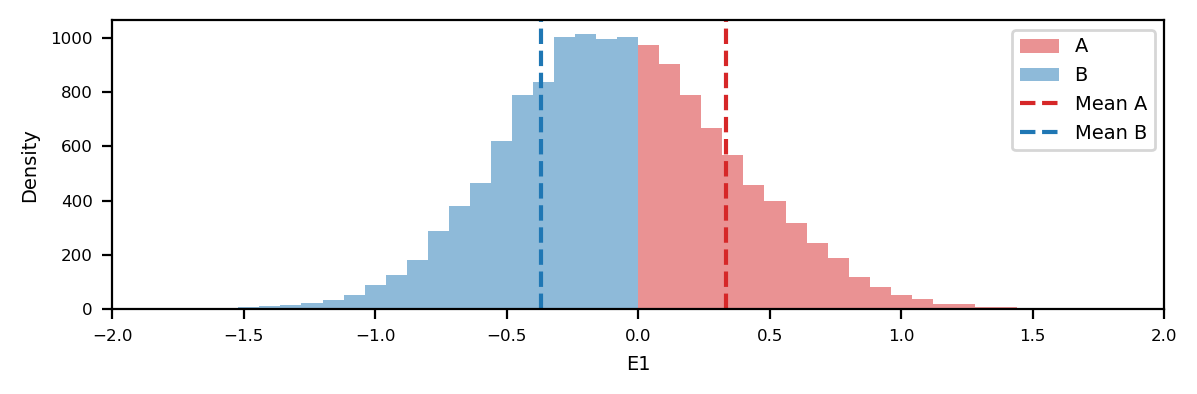

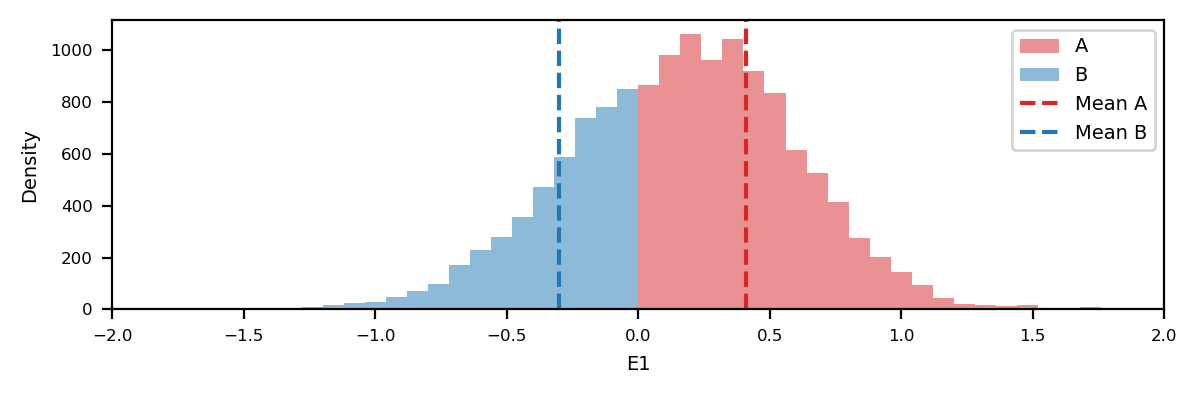

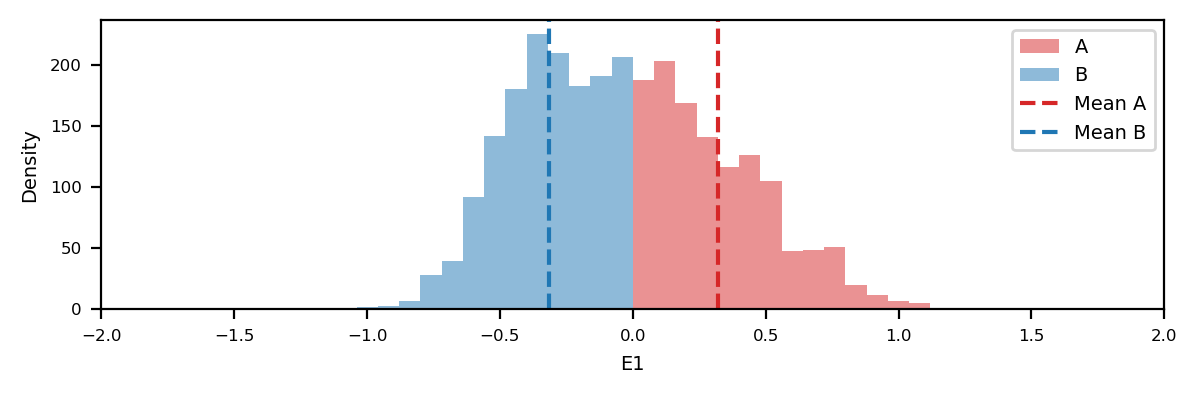

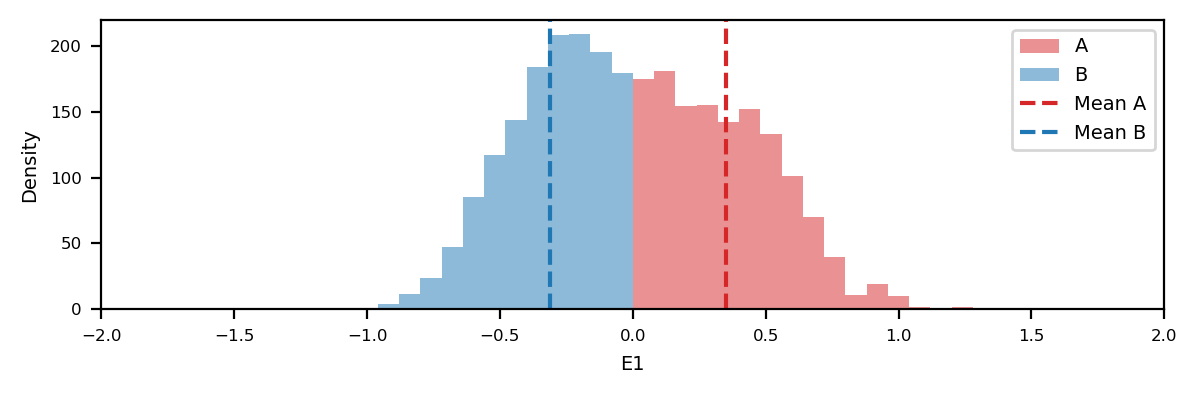

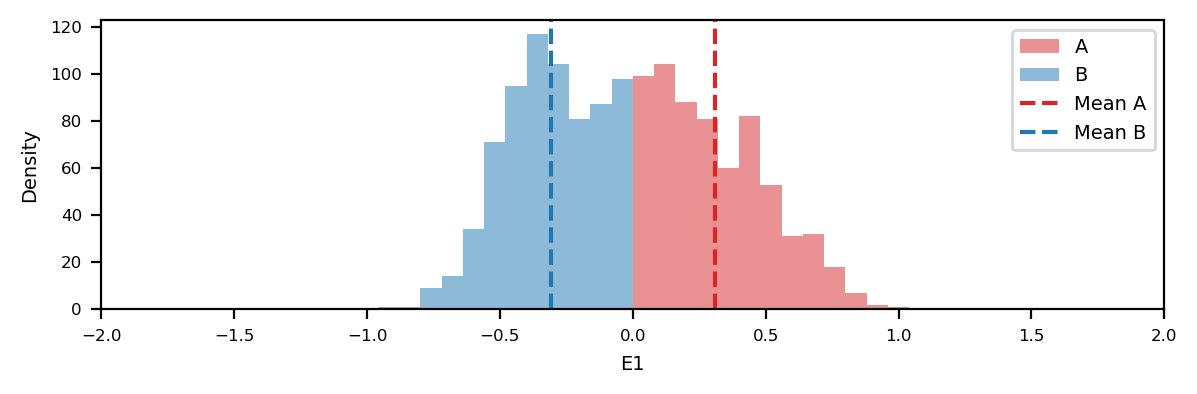

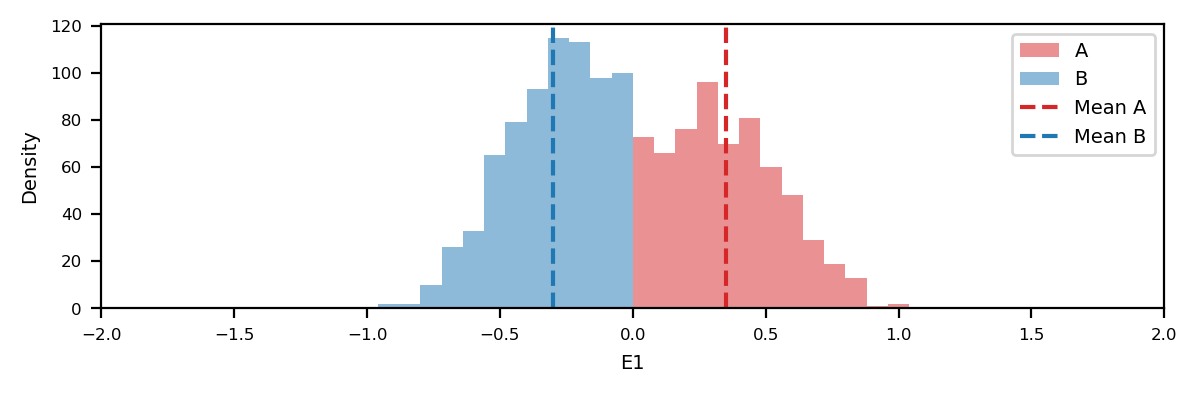

In [7]:

for res, dict in eig_dict.items():
    df_e1_x = dict['X']
    df_e1_y = dict['Y']
    
    plot_e1_distribution(df_e1_x, title=None)
    plot_e1_distribution(df_e1_y, title=None)

## Load back the traces

To be able to start from here

In [8]:
import arviz as az
import numpy as np

In [9]:
trace_dir = "../results/traces/"
chr8_x_path = f"{trace_dir}/14.chr8.10kb.X.mix.arms.trace.nc"
chr8_y_path = f"{trace_dir}/14.chr8.10kb.Y.mix.arms.trace.nc"

traces = {'10kb.X': az.from_netcdf(chr8_x_path),
          '10kb.Y': az.from_netcdf(chr8_y_path)}

traces['10kb.X']

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

In [10]:
display(
    az.summary(traces['10kb.X'], var_names=["mu", "sigma", "grw_sigma"]),
    az.summary(traces['10kb.Y'], var_names=["mu", "sigma", "grw_sigma"])
)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[B],-0.271,0.062,-0.306,-0.116,0.023,0.024,16.0,23.0,1.33
mu[A],0.252,0.152,-0.122,0.329,0.057,0.058,17.0,22.0,1.33
sigma[B],0.378,0.125,0.319,0.688,0.047,0.048,17.0,23.0,1.33
sigma[A],0.331,0.011,0.319,0.359,0.004,0.004,17.0,24.0,1.33
grw_sigma,0.121,0.010,0.098,0.136,0.003,0.003,17.0,23.0,1.32


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[B],-0.091,0.117,-0.150,0.198,0.044,0.045,17.0,23.0,1.33
mu[A],0.397,0.083,0.193,0.442,0.031,0.032,17.0,24.0,1.33
sigma[B],0.333,0.008,0.312,0.343,0.003,0.003,17.0,24.0,1.33
sigma[A],0.345,0.075,0.307,0.531,0.028,0.029,17.0,24.0,1.33
grw_sigma,0.092,0.006,0.080,0.103,0.001,0.000,46.0,63.0,1.09


In [11]:
# get the w variable and stack for each model

w_vars = {name: trace.posterior.w.stack(sample=('chain', 'draw')) for name, trace in traces.items()}

for key,w in w_vars.items():
    print(f"Model: {key}")
    display(w)

Model: 10kb.X


<xarray.DataArray 'w' (pos: 13841, sample: 7000)> Size: 775MB
array([[0.88868443, 0.96762345, 0.82935755, ..., 0.11033061, 0.08531548,
        0.12972133],
       [0.88545701, 0.96979124, 0.82865002, ..., 0.10078475, 0.07498749,
        0.14095884],
       [0.89311791, 0.966446  , 0.84312728, ..., 0.10450915, 0.08553388,
        0.11532705],
       ...,
       [0.9999546 , 0.99492452, 0.9999546 , ..., 0.00856191, 0.00518076,
        0.00263114],
       [0.9999546 , 0.99444874, 0.9999546 , ..., 0.00709892, 0.00531128,
        0.00256609],
       [0.9999546 , 0.99352761, 0.9999546 , ..., 0.00690521, 0.00546703,
        0.002593  ]], shape=(13841, 7000))
Coordinates:
  * pos      (pos) int64 111kB 210000 220000 230000 ... 145050000 145060000
  * sample   (sample) object 56kB MultiIndex
  * chain    (sample) int64 56kB 0 0 0 0 0 0 0 0 0 0 0 ... 6 6 6 6 6 6 6 6 6 6 6
  * draw     (sample) int64 56kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

Model: 10kb.Y


<xarray.DataArray 'w' (pos: 13839, sample: 7000)> Size: 775MB
array([[0.83625191, 0.91495838, 0.78445262, ..., 0.88859402, 0.81853483,
        0.90382438],
       [0.83115096, 0.9136544 , 0.78472169, ..., 0.90559141, 0.8235971 ,
        0.91250077],
       [0.82278903, 0.92377561, 0.76961452, ..., 0.9068753 , 0.82725403,
        0.90409278],
       ...,
       [0.99617786, 0.99425735, 0.99659609, ..., 0.9999546 , 0.99949643,
        0.99983162],
       [0.99626492, 0.99499315, 0.99608382, ..., 0.9999546 , 0.9995238 ,
        0.99984471],
       [0.99567903, 0.99433809, 0.99602968, ..., 0.9999546 , 0.99958467,
        0.99985823]], shape=(13839, 7000))
Coordinates:
  * pos      (pos) int64 111kB 210000 220000 230000 ... 145050000 145060000
  * sample   (sample) object 56kB MultiIndex
  * chain    (sample) int64 56kB 0 0 0 0 0 0 0 0 0 0 0 ... 6 6 6 6 6 6 6 6 6 6 6
  * draw     (sample) int64 56kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

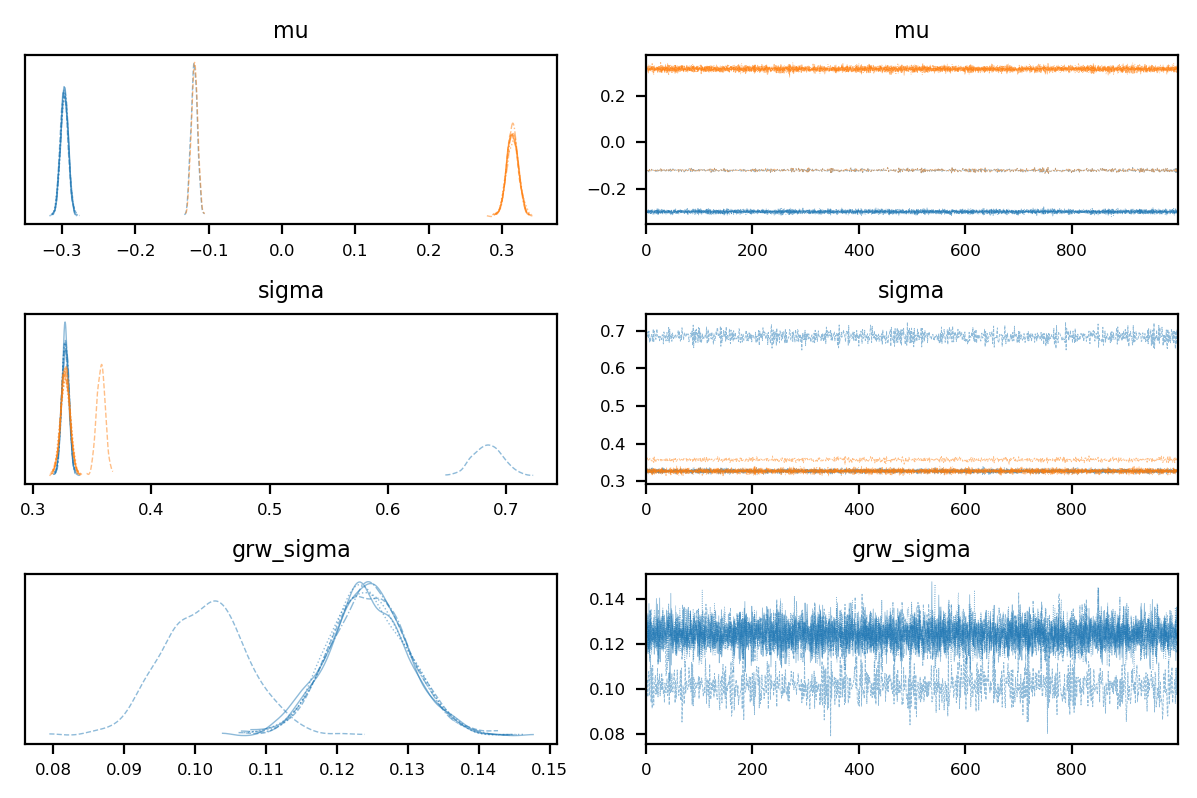

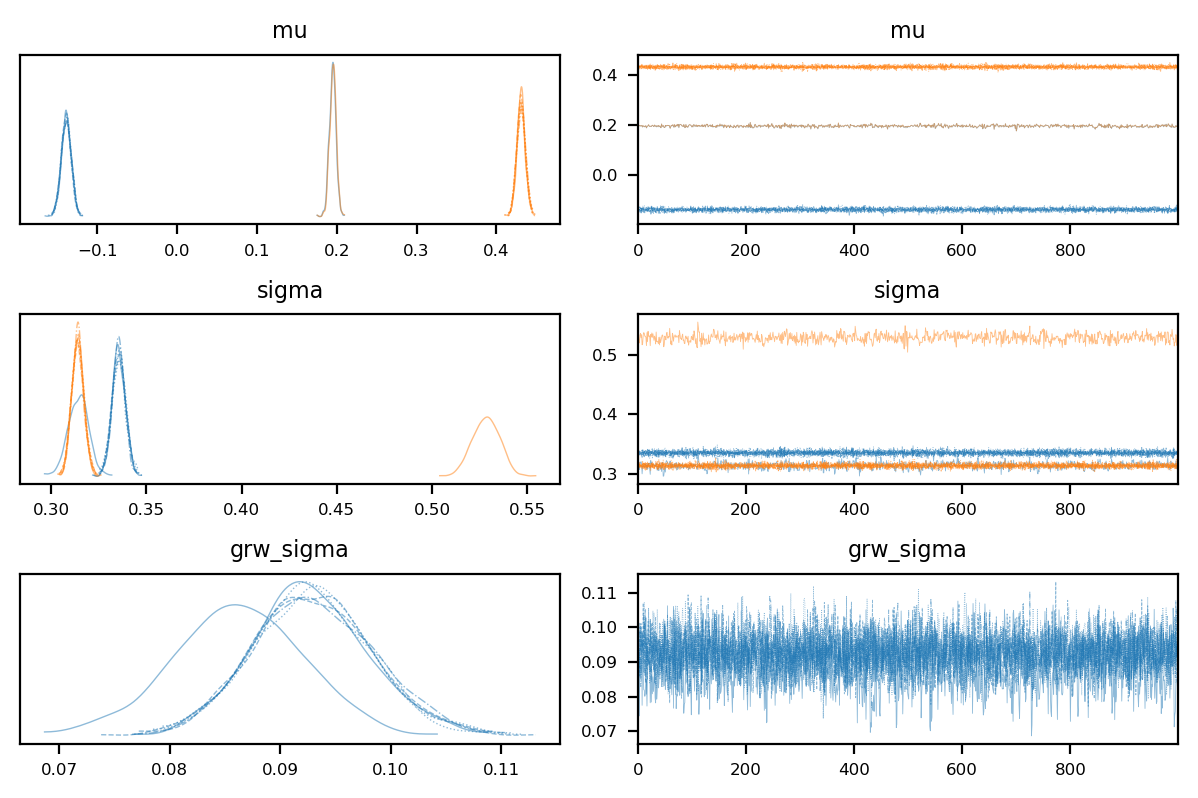

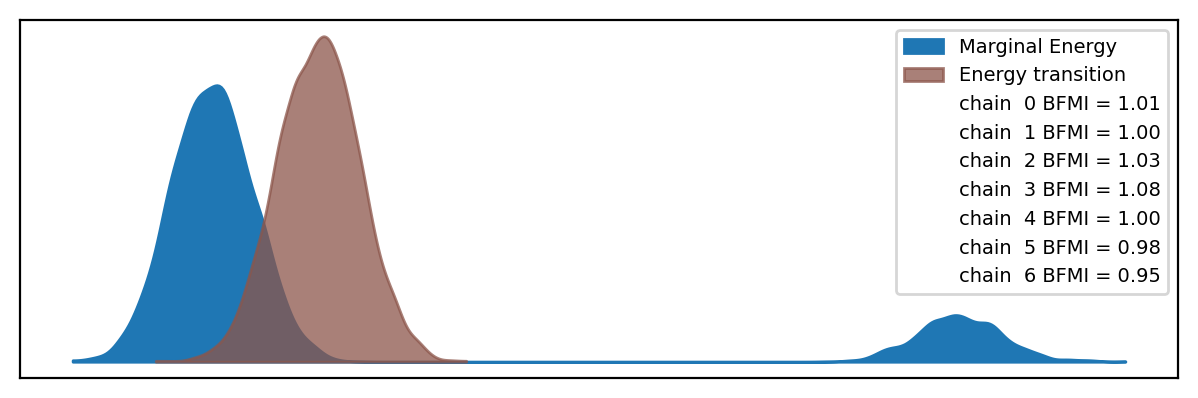

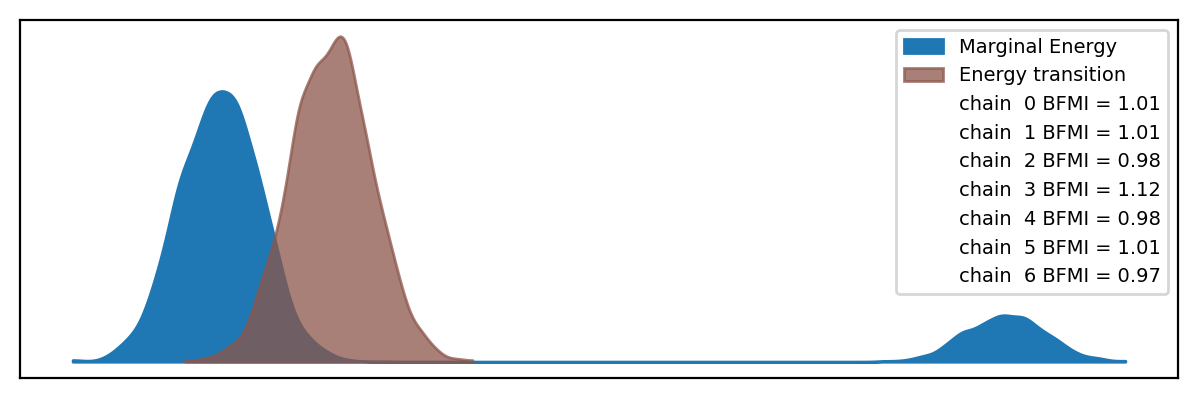

In [12]:
import matplotlib.pyplot as plt
plt.style.use('smaller.mplstyle')

f,axs = plt.subplots(3,2, figsize=(6,4), layout='tight',) 

az.plot_trace(traces['10kb.X'], var_names=['mu', 'sigma', 'grw_sigma'], compact=True, axes=axs, 
              trace_kwargs={'linewidth':0.3, 'alpha':0.5},
              plot_kwargs={'alpha':0.5, 'linewidth':0.5})
for ax in axs.ravel():
    ax.title.set_fontsize(8)
    ax.xaxis.label.set_size(7)
    ax.yaxis.label.set_size(7)
    ax.tick_params(labelsize=6)

f,axs = plt.subplots(3,2, figsize=(6,4), layout='tight',)

az.plot_trace(traces['10kb.Y'], var_names=['mu', 'sigma', 'grw_sigma'], compact=True, axes=axs, 
              trace_kwargs={'linewidth':0.3, 'alpha':0.5},
              plot_kwargs={'alpha':0.5, 'linewidth':0.5})
for ax in axs.ravel():
    ax.title.set_fontsize(8)
    ax.xaxis.label.set_size(7)
    ax.yaxis.label.set_size(7)
    ax.tick_params(labelsize=6)

az.plot_energy(traces['10kb.X'], backend_kwargs={'layout': 'tight'});
az.plot_energy(traces['10kb.Y'], backend_kwargs={'layout': 'tight'});


Model: 10kb.X, non-empty bins: 13841


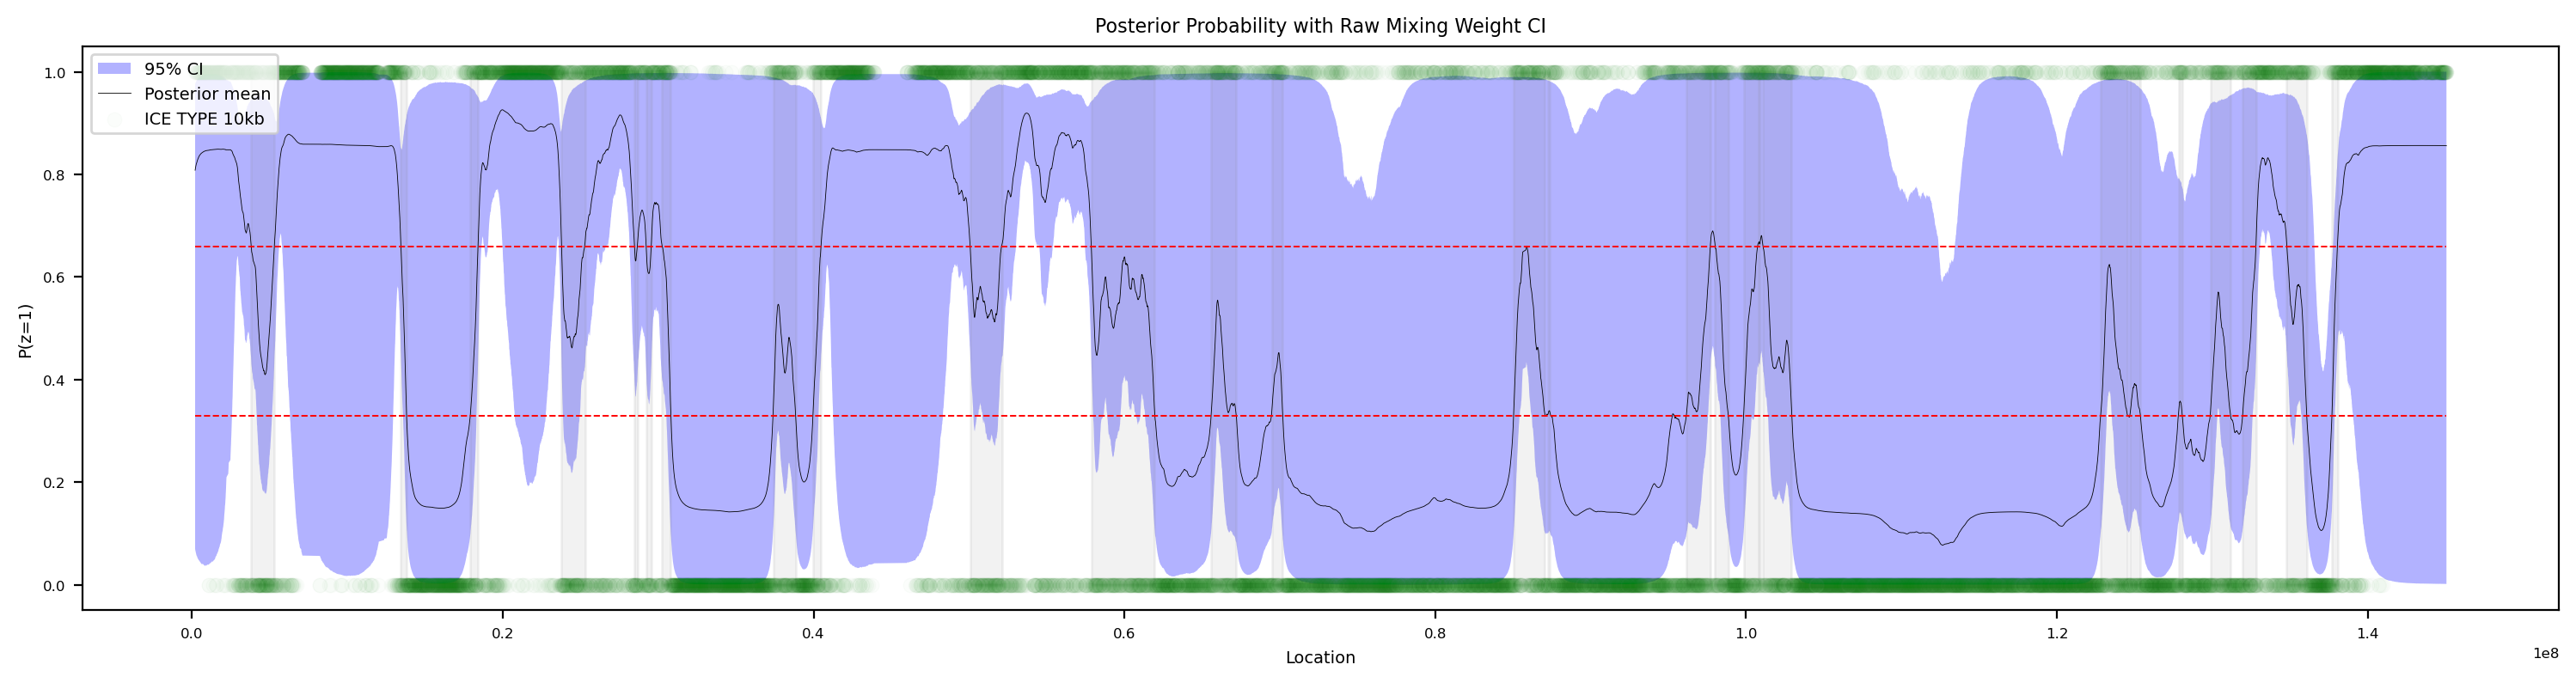

Model: 10kb.Y, non-empty bins: 13839


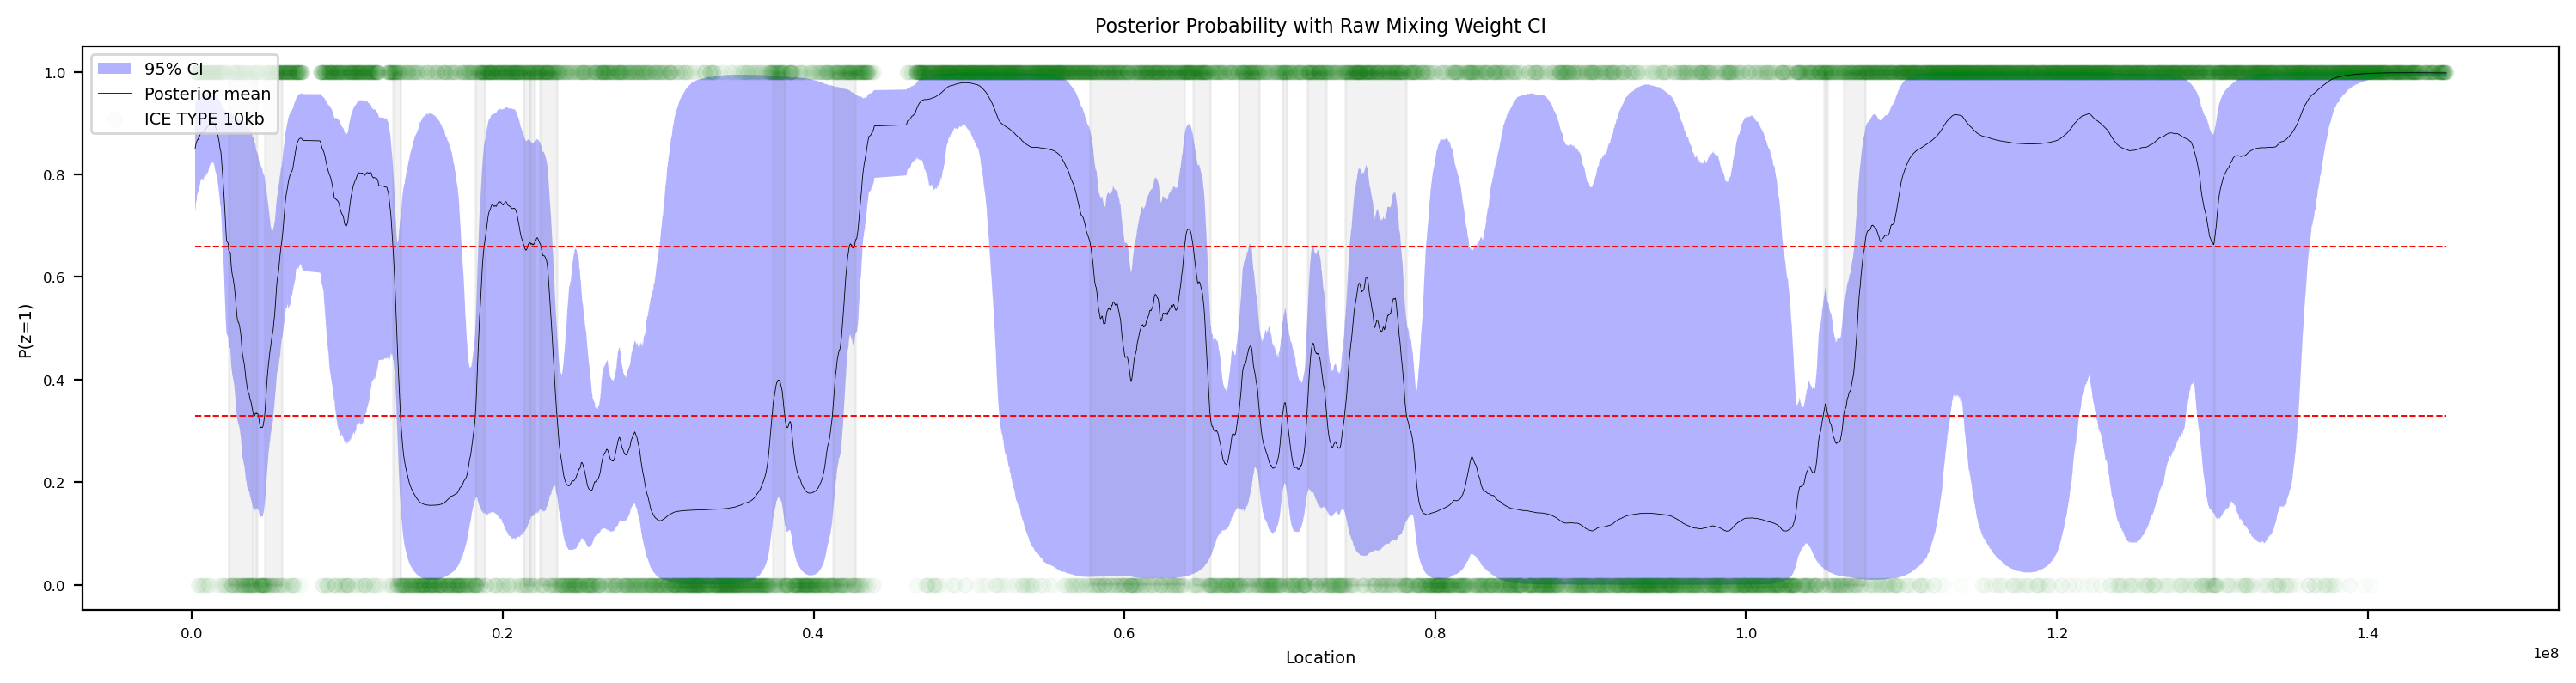

In [13]:
import matplotlib.pyplot as plt

# Set matplotlib to display retina format
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

for name, w_stack in w_vars.items():
    print(f"Model: {name}, non-empty bins: {w_stack.pos.size}")   
    w_mean = w_stack.mean(dim=('sample'))
    w_ci_direct = w_stack.quantile([0.05, 0.95], dim=("sample"))
    w_ci_upper_direct = w_ci_direct.sel(quantile=0.05)
    w_ci_lower_direct = w_ci_direct.sel(quantile=0.95)

    x = w_stack["pos"]

    f, ax = plt.subplots(figsize=(15, 4))

    ax.fill_between(
        x,
        w_ci_lower_direct,
        w_ci_upper_direct,
        alpha=0.3,
        label="95% CI",
        color="blue",
        ec='None'
    )

    x_grey = x.copy()
    x_grey = x_grey.where(
        ~((w_mean < 1/3) | (w_mean > 2/3)),
        np.nan
    )

    # Grey band
    ax.fill_between(
        x, 
        0,
        1,
        where=x_grey.notnull(),
        alpha=0.1,
        color='gray')

    # # Compare e1 predictions
    e1 = traces[name].observed_data.y_hat.values
    hard_assign =  e1 > 0

    ax.plot(x, w_mean, label="Posterior mean", color="black", linewidth=0.3)

    ax.scatter(x, hard_assign, label="ICE TYPE 10kb", color="green", linewidth=0.5, alpha=0.015)

    # Plot the 0.5 line
    ax.hlines([0.66, 0.33], min(x), max(x), color="red", linestyle="--", linewidth=0.7)

    plt.ylabel("P(z=1)")
    plt.xlabel("Location")
    plt.legend(loc='upper left')
    plt.title("Posterior Probability with Raw Mixing Weight CI")
    plt.tight_layout()
    plt.show()




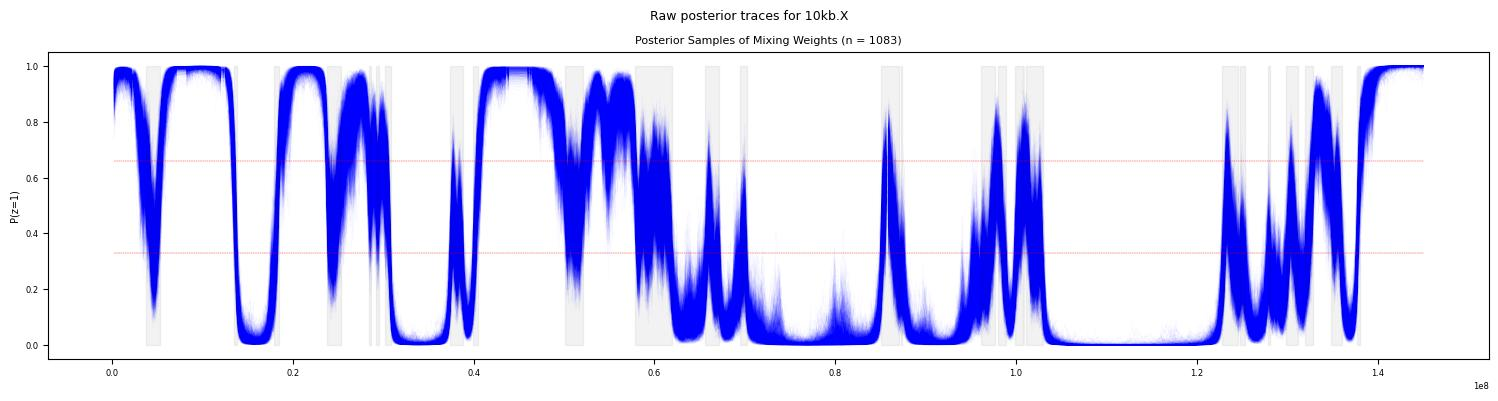

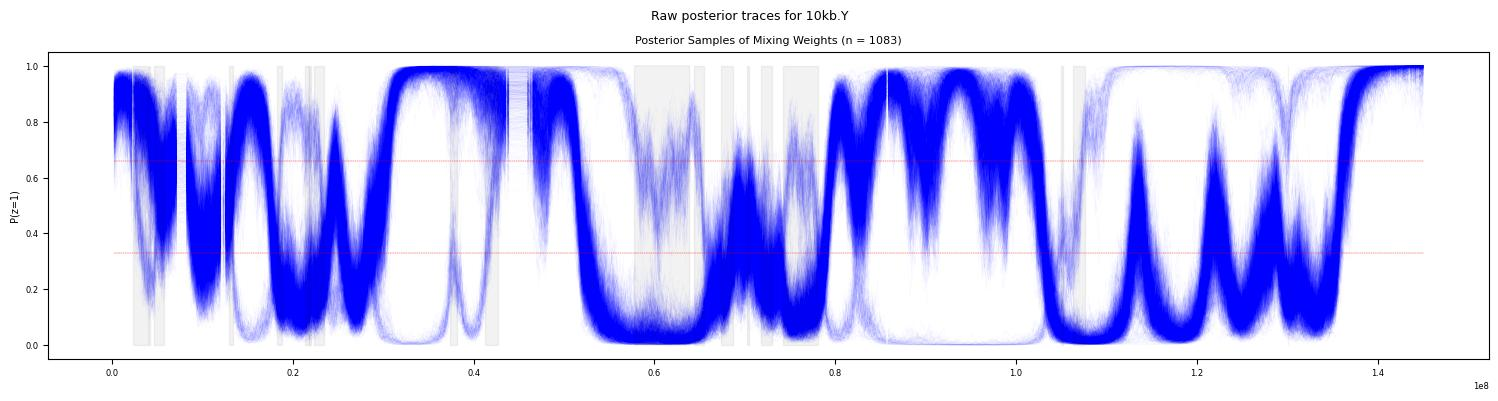

In [14]:
# Plot the all posterior samples of `w` in a single plot
# but start out with a smaller subset
# set the inline display to low dpi
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('jpg')

for name, w_stack in w_vars.items():
    x = w_stack["pos"]
    w_mean = w_stack.mean(dim=('sample'))
    total_points = 15_000_000
    n_curves = total_points // len(x)
    w_subset = w_stack.isel(sample=slice(0, n_curves))  # Adjust the slice as needed

    f, ax = plt.subplots(figsize=(15, 4))

    plt.suptitle(f"Raw posterior traces for {name}")

    for i in range(w_subset.shape[1]):
        ax.plot(x, w_subset[:,i], alpha=0.1, linewidth=0.05, color="blue")

    # Grey band

    x_grey = x.where(
        ~((w_mean < 1/3) | (w_mean > 2/3)),
        np.nan
    )

    ax.fill_between(
        x, 
        0,
        1,
        where=x_grey.notnull(),
        alpha=0.1,
        color='gray')

    ax.hlines([0.66, 0.33], min(x), max(x), color="red", linestyle="--", linewidth=0.3)
    ax.set_ylabel("P(z=1)")

    plt.title(f"Posterior Samples of Mixing Weights (n = {w_subset.shape[1]})")
    plt.tight_layout()
    plt.show()


## Count the transitions

Start with just one trace

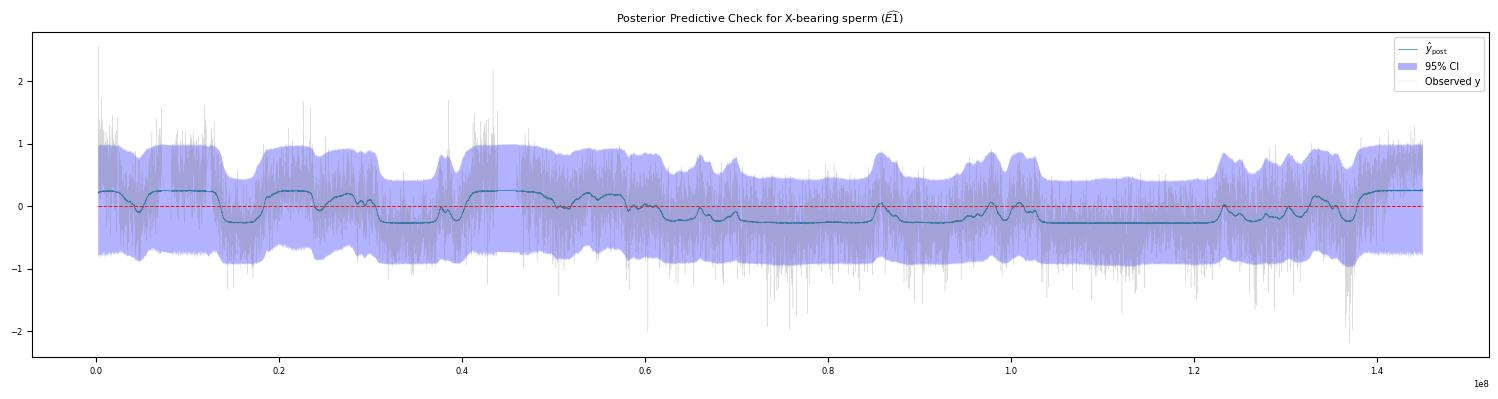

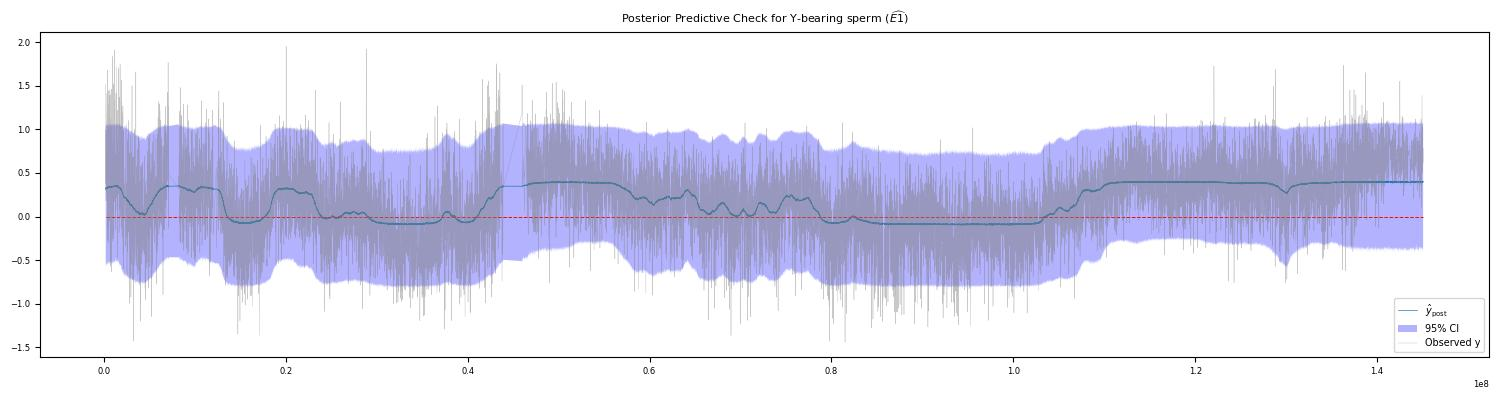

In [15]:
import matplotlib.pyplot as plt

trace = traces['10kb.X'] 

yhat_mean = trace.posterior_predictive.y_hat.mean(dim=('chain', 'draw'))
yhat_upper = trace.posterior_predictive.y_hat.quantile(0.975, dim=('chain', 'draw'))
yhat_lower = trace.posterior_predictive.y_hat.quantile(0.025, dim=('chain', 'draw'))

f,ax = plt.subplots(figsize=(15,4))

ax.plot(yhat_mean['pos'],yhat_mean, label=r"$\hat{y}_{\mathrm{post}}$", linewidth=0.5)
ax.hlines(0, min(yhat_mean['pos']), max(yhat_mean['pos']), color='red', linestyle='--', linewidth=0.7)

ax.fill_between(yhat_mean['pos'], 
                yhat_upper,
                yhat_lower,
                alpha=0.3, label="95% CI", color='blue', ec='None')

ax.plot(trace.observed_data.y_hat['pos'], trace.observed_data.y_hat, alpha=0.3, color='gray', linewidth=0.3, label="Observed y")

plt.title("Posterior Predictive Check for X-bearing sperm ($\\widehat{E1}$)")
plt.legend()
plt.tight_layout()

trace = traces['10kb.Y'] 

yhat_mean = trace.posterior_predictive.y_hat.mean(dim=('chain', 'draw'))
yhat_upper = trace.posterior_predictive.y_hat.quantile(0.975, dim=('chain', 'draw'))
yhat_lower = trace.posterior_predictive.y_hat.quantile(0.025, dim=('chain', 'draw'))

f,ax = plt.subplots(figsize=(15,4))

ax.plot(yhat_mean['pos'],yhat_mean, label=r"$\hat{y}_{\mathrm{post}}$", linewidth=0.5)
ax.hlines(0, min(yhat_mean['pos']), max(yhat_mean['pos']), color='red', linestyle='--', linewidth=0.7)

ax.fill_between(yhat_mean['pos'], 
                yhat_upper,
                yhat_lower,
                alpha=0.3, label="95% CI", color='blue', ec='None')

ax.plot(trace.observed_data.y_hat['pos'], trace.observed_data.y_hat, alpha=0.5, color='gray', linewidth=0.3, label="Observed y")

plt.title("Posterior Predictive Check for Y-bearing sperm ($\\widehat{E1}$)")
plt.legend()
plt.tight_layout()


In [16]:
import numpy as np
import xarray as xr

def count_crossings(w_stack, threshold=0.5):
    # Boolean mask
    above = w_stack > threshold
    above_shifted = above.shift(pos=-1, fill_value=False)

    # Strip last element (to align shapes after shift)
    above = above.isel(pos=slice(0, -1))
    above_shifted = above_shifted.isel(pos=slice(0, -1))

    # Crossings
    cross_up = ((~above) & (above_shifted)).sum(dim="sample")
    cross_down = ((above) & (~above_shifted)).sum(dim="sample")

    # Attach to Dataset
    result = xr.Dataset({
        "cross_up": cross_up,
        "cross_down": cross_down
    })

    return result.to_dataframe()

def compute_ci_intervals(w_stack):
    """
    We need intervals for transition zones; where the data does not full our CI rule:
    ~(1/3 < w_mean < 2/3) => transition zone
    """
    
    ci_upper, ci_lower = w_stack.quantile([0.05, 0.95], dim=("sample"))
    ci_upper = ci_upper.rename("ci_upper")
    ci_lower = ci_lower.rename("ci_lower")
    in_transition = (~((ci_upper <= 1/3) | (ci_upper >= 2/3)) | ~((ci_lower <= 1/3) | (ci_lower >= 2/3)))

    # All True that come in a row is a transition zone, and should have an ID
    starts = in_transition & ~in_transition.shift(pos=1, fill_value=False)

    # Cumulative sum of starts to get unique IDs
    transition_id = starts.cumsum(dim="pos")

    transition_id = transition_id.where(in_transition, drop=True)

    transition_id = transition_id.rename("CI_ID")

    # Convert to DataFrame
    df = transition_id.rename("CI_ID").to_dataframe()

    return df

def get_ci_type(w_mean, df_summarised):
    res = w_mean.pos[1].values - w_mean.pos[0].values  # fixed resolution
    i_before = df_summarised["start"] - res
    i_after = df_summarised["end"] + res
    w_before = w_mean.sel(pos=i_before.values, method='bfill')
    w_after = w_mean.sel(pos=i_after.values, method='ffill')
    sign_before, sign_after = w_before > 0.5, w_after > 0.5

    types = []
    for before, after in zip(sign_before.values, sign_after.values):
    
        if before == after:
            if before > 0:
                types.append("AA")
            else:
                types.append("BA")
        elif before < after:
            types.append("BA")
        else:
            types.append("AB")

    return types
    


In [17]:
def process_trace(name, trace, threshold=0.5):
    """
    Process a single trace to compute summarized crossing data and save intermediate steps.

    Parameters:
        trace: Trace object containing posterior data.
        threshold (float): Threshold for counting crossings.

    Returns:
        dict: A dictionary containing intermediate and final results.
    """
    # Stack into samples
    w_stack = trace.posterior.w.stack(sample=("chain", "draw"))
    count_stack = count_crossings(w_stack, threshold=threshold)
    ci_stack = compute_ci_intervals(w_stack)
    
    # Merge the two DataFrames, join on what's left in ci_stack (in_transition)
    df_merged = ci_stack.merge(count_stack, left_index=True, right_index=True, how="inner")
    df_merged.CI_ID = df_merged.CI_ID.astype(int)
    
    # Count the crossings per CI_ID
    df_summarised = (
        df_merged
        .reset_index()
        .groupby('CI_ID')
        .agg({
            'cross_up': 'sum',
            'cross_down': 'sum',
            'pos': ['min', 'max', 'count']
        })
    )
    df_summarised.columns = ['n_up', 'n_down', 'start', 'end', 'n_bins']
    
    # Assign CI type
    types = get_ci_type(w_stack.mean(dim='sample'), df_summarised)
    df_summarised = df_summarised.assign(type=types)
    
    # Save all intermediate results in a dictionary
    return {
        "name": name,
        "w_stack": w_stack,
        "df_merged": df_merged,
        "df_summarised": df_summarised
    }

def plot_trace_results(data, bin_size=500_000):
    """
    Plot the posterior mean, transition zones, and crossing histograms.

    Parameters:
        data (dict): Dictionary containing `w_stack`, `df_merged`, and `df_summarised`.
        bin_size (int): Size of bins for the histograms.
    """
    w_stack = data["w_stack"]
    df_merged = data["df_merged"]
    df_summarised = data["df_summarised"]

    x = w_stack["pos"]
    y = w_stack.mean(dim=('sample'))

    f, ax = plt.subplots(figsize=(15, 4))
    ax.plot(x, y, label="Posterior mean", color="black", linewidth=0.8)
    ax.fill_between(
        x,
        w_stack.quantile(0.025, dim=("sample")),
        w_stack.quantile(0.975, dim=("sample")),
        alpha=0.3,
        label="95% CI",
        color="blue",
        ec='None'
    )
    ax.axhline(1/3, color="red", linestyle="--", linewidth=0.4, label="Thresholds")
    ax.axhline(2/3, color="red", linestyle="--", linewidth=0.4)

    # Create a vspan for the transition zones
    for i, row in df_summarised.iterrows():
        start = row['start']
        end = row['end']
        color = '0.8'
        label = "Transition zone" if i == 0 else None
        ax.axvspan(start, end, color=color, alpha=0.3, ec='None', label=label)

    # Plot histograms for each CI_ID
    colormap = {
        "BA": "tab:red",
        "AB": "tab:blue",
        "AA": "darkred",
        "BB": "darkblue"
    }
    colors_used = set()
    for cid, group in df_merged.groupby("CI_ID"):
        type = df_summarised.loc[cid, 'type']
        norm_col = 'cross_up' if type == "BA" else 'cross_down'
        norm_factor = group[norm_col].sum()
        if type in ('AA', 'BB'):
            # Which column has the most crossings? Chose that
            norm_col = 'cross_up' if group['cross_up'].sum() > group['cross_down'].sum() else 'cross_down'
            norm_factor = group[norm_col].sum()
        
        # Normalize so all crossings sum to 1
        norm = group['cross_up'] / norm_factor
        norm2 = group['cross_down'] / norm_factor
        

        bins = np.arange(group.index.min(), group.index.max() + bin_size, bin_size)
        label = f"{type} crosses"

        label = label if type not in colors_used else None
        colors_used.add(type)
        ax.hist(x=group.index, weights=norm, color=colormap['BA'], bins=bins, alpha=0.4, label=label)
        ax.hist(x=group.index, weights=norm2, color=colormap['AB'], bins=bins, alpha=0.4, label='AB' if label else None)


    ax.set_title(f"Histogram: Each CI is normalized to sum to 1, binsize={bin_size//1000}kb")
    plt.legend()
    plt.suptitle("Posterior Mean with Transition Zones and Crossing Histograms")
    plt.tight_layout()
    plt.show()

Plotting results for 10kb.X


,n_up,n_down,start,end,n_bins,type
CI_ID,,,,,,
1,12112,14053,2590000,4160000,158,AA
2,5324,2943,5170000,5630000,47,AA
3,743,1491,5780000,6310000,53,AA
4,3285,5036,12960000,13570000,62,AA
5,4223,1615,18320000,18660000,35,AA
6,147,148,18760000,19060000,31,AA
7,1373,2063,19980000,20760000,79,AA
8,1925,1179,22780000,23500000,73,AA
9,1421,4090,23610000,23870000,27,AA


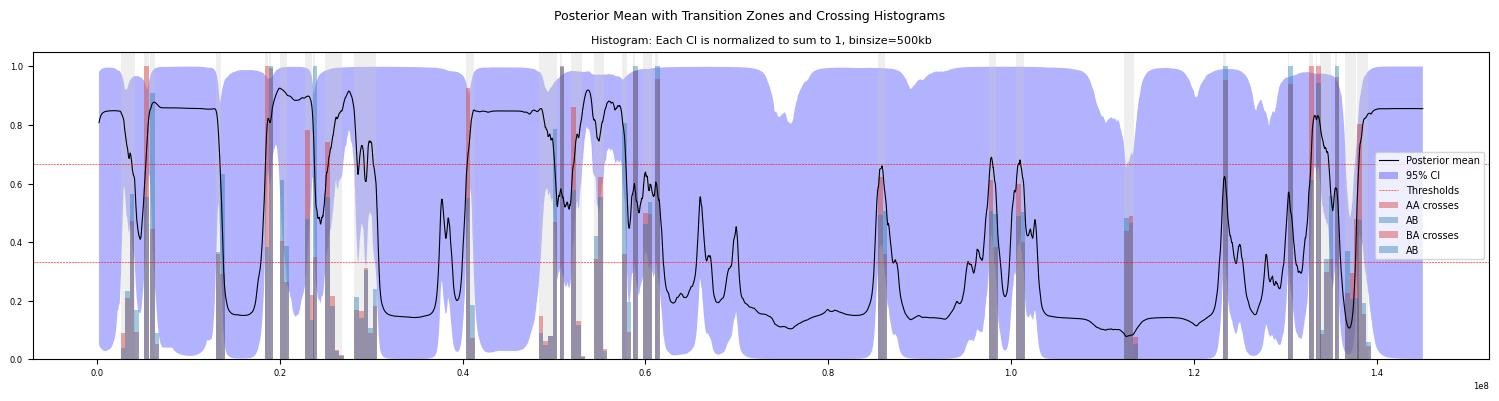

Plotting results for 10kb.Y


,n_up,n_down,start,end,n_bins,type
CI_ID,,,,,,
1,7563,11347,1970000,2880000,71,AA
2,13855,11241,5260000,9260000,286,AA
3,20,23,11160000,11160000,1,AA
4,5370,8058,11180000,13160000,148,AA
5,105,268,13230000,13230000,1,BA
6,6789,4168,17350000,18430000,109,BA
7,15172,17767,23200000,30110000,689,BA
8,13915,10255,41940000,43170000,124,AA
9,803,1555,51300000,51940000,65,AA


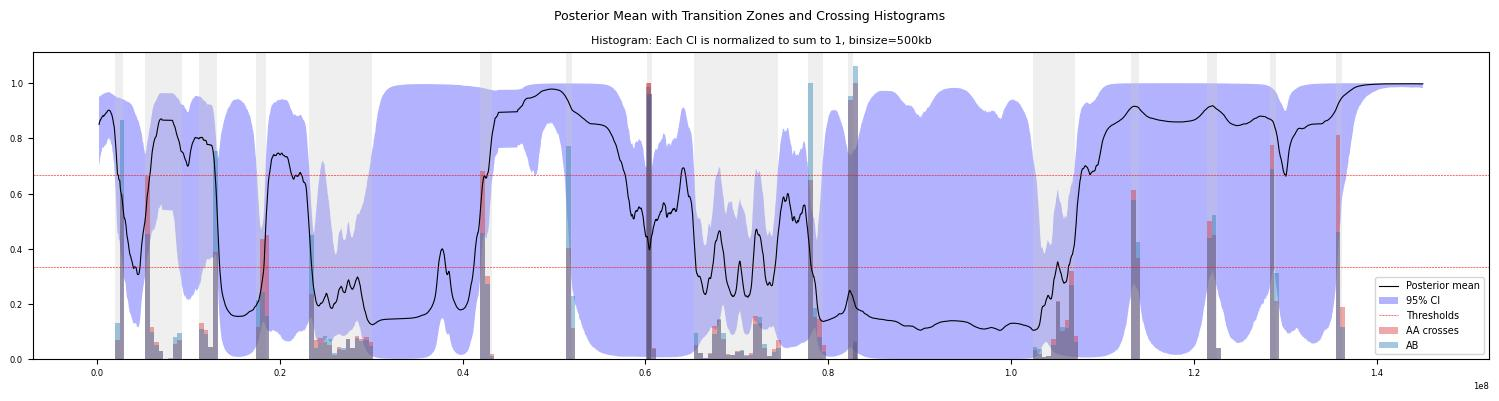

In [18]:
# Process all traces and save results in a dictionary
processed_data = {name: process_trace(name, trace, threshold=0.5) for name, trace in traces.items()}


# Plot results for a specific trace
for name, processed in processed_data.items():
    print(f"Plotting results for {name}")
    display(processed["df_summarised"])
    plot_trace_results(processed, bin_size=500_000)